MLT-Lab-CSE6024_LAB–ASSESSMENT-1.2: Implementation and Comparison of the Performance Analysis of  
L1 Regularization (Lasso Regression) and  L2 Regularization (Ridge  Regression)  on house_price dataset

Submitted By: 20MAI0001 - NIHARIKA MAITRA

Git Repo link :

In [145]:
#To Import the required Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import median
import warnings
warnings.filterwarnings('ignore')

In [146]:
# To Read the dataset onto a variable (DataFrame) using Pandas
data1 = pd.read_csv("house_price.csv") #house_price.csv

#Display the first 10 records
data1.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [147]:
# All attributes/Features selected from the Input dataset to be stored in a dataframe  

df1 = data1[["id", "date", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price" ]] 
df1


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


To perform some Feature engineering on the Input Boston dataset :

In [148]:
# To view detailed information of the different Data Types of the variables present in the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [149]:
# To check and give the count of missing values present for each of the attributes of the dataset
df1.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [150]:
#5 Handling Missing Values - Data Imputation
df1["sqft_above"] = df1["sqft_above"].fillna(df1["sqft_above"].median()) 

In [151]:
#Recasting variables bathroomsand floors to their correct data types
df1['bathrooms'] = df1['bathrooms'].astype('int')
df1['floors'] = df1['floors'].astype('int')

In [152]:
df1.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1,1180,5650,1,0,0,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2,2570,7242,2,0,0,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1,770,10000,1,0,0,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3,1960,5000,1,0,0,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2,1680,8080,1,0,0,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  int32  
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  int32  
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [154]:
#To display all the unique values present for the Feature Variable 'bedrooms' in the dataset
df1['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [155]:
#To display all the unique values present for the Feature Variable 'yr_built' in the dataset
df1['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [156]:
#To display the number of occurrences of each of the distinct values of the Feature Variable 'zipcode' in the dataset
df1['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [157]:
#To display the number of occurrences of each of the distinct values of the Feature Variable 'floors' in the dataset
df1['floors'].value_counts()

1    12590
2     8402
3      621
Name: floors, dtype: int64

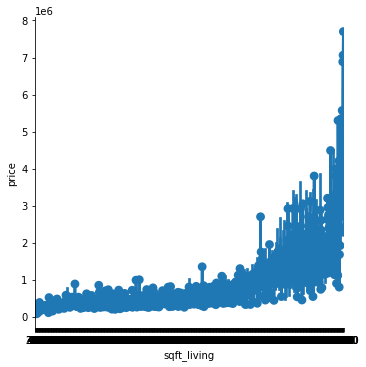

In [158]:
#Plotting Factor Plot betweeen 'sqft_living' and 'price'

sns.factorplot(x = 'sqft_living', y = 'price', data = df1)

                 price
sqft_living           
430            80000.0
828           110000.0
500           125000.0
844           139950.0
290           142000.0
...                ...
8000         5350000.0
9200         5570000.0
9890         6885000.0
10040        7062500.0
12050        7700000.0

[1038 rows x 1 columns]


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

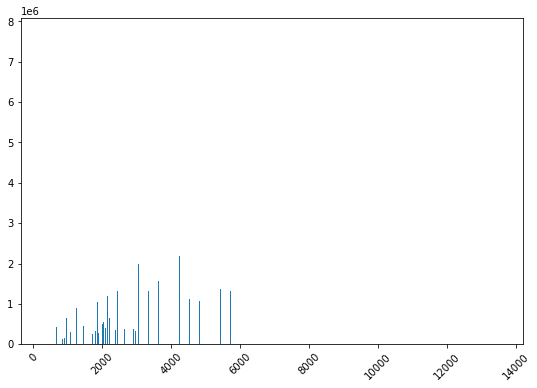

In [159]:
#Plotting  Bar graph betweeen 'sqft_living' and 'price'

groupedby_p = df1.groupby('sqft_living')[['price']].mean()
print(groupedby_p.sort_values(by = ['price']))
plt.figure(figsize=(9,6))
plt.bar(x=df1['sqft_living'],height=df1['price'])
plt.xticks(rotation=45)

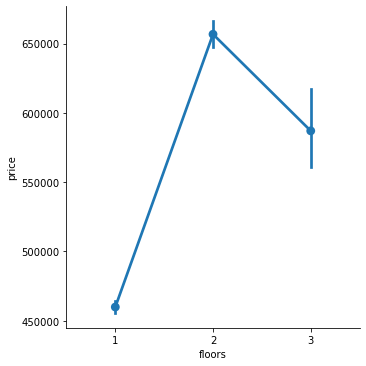

In [160]:
#Plotting Factor Plot betweeen 'floors' and 'price'

sns.factorplot(x = 'floors', y = 'price', data = df1)

                price
floors               
1       459900.094043
3       587045.027375
2       656775.513211


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

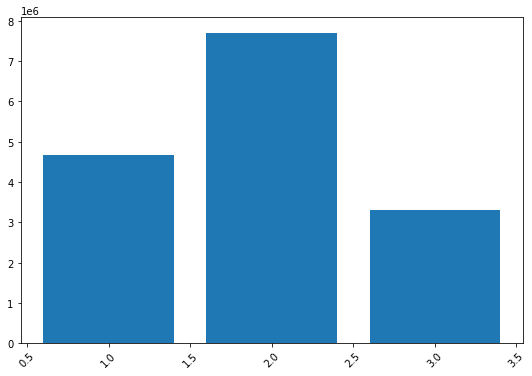

In [161]:
#Plotting  Bar graph betweeen 'floors' and 'price'

groupedby_p = df1.groupby('floors')[['price']].mean()
print(groupedby_p.sort_values(by = ['price']))
plt.figure(figsize=(9,6))
plt.bar(x=df1['floors'],height=df1['price'])
plt.xticks(rotation=45)

Converting the data type of "date" from string to float using LabelEncoder() :

In [162]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for date in df1.columns:
        if df1[date].dtype == object:
            df1[date] = le.fit_transform(df1[date])
        else:
            pass

#To Set the Predictor (X ---> "id", "date", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price") Variables and Response(Y ---> "price") Variable :

In [163]:

X = df1.drop("price", axis=1)
Y = df1["price"]

In [164]:
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,3,1,1180,5650,1,0,0,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,220,3,2,2570,7242,2,0,0,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,290,2,1,770,10000,1,0,0,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,220,4,3,1960,5000,1,0,0,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,283,3,2,1680,8080,1,0,0,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,19,3,2,1530,1131,3,0,0,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,288,4,2,2310,5813,2,0,0,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,52,2,0,1020,1350,2,0,0,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,252,3,2,1600,2388,2,0,0,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [165]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [166]:
#8 Splitting the Input data of the dataframe into Training and Testing Sets with the use of train_test_split()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)


Implementation of the L2 Regularization (Ridge Regression) :

In [167]:
# List to maintain the different cross-validation scores and values of alpha
cvs_ridge = []
alpha = []

In [168]:
#computing the different values of cross-validation scores
for i in range(1, 9):
    rm = Ridge(alpha = i * 0.25)
    rm.fit(X_train, Y_train)
    s1 = cross_val_score(rm, X, Y, cv = 10)
    avg_cvs_ridge = mean(s1)*100
    cvs_ridge.append(avg_cvs_ridge)
    alpha.append(i * 0.25)

In [169]:
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cvs_ridge[i]))

0.25 : 69.63563640379512
0.5 : 69.63577412584321
0.75 : 69.63589051160068
1.0 : 69.6359857751527
1.25 : 69.63606012975033
1.5 : 69.63611378224766
1.75 : 69.6361469399666
2.0 : 69.63615980656468


In [170]:
# To Build and fit the Ridge Regression model with the best value of alpha for the given input data being 2
rrm = Ridge(alpha = 2)
rrm.fit(X_train, Y_train)

Ridge(alpha=2)

In [171]:
# To compute the Predictions or Y-hat (Y_pred) 
Y_pred_rm = rrm.predict(X_test)
Y_pred_rm

array([999848.64431645, 626213.45843134, 178389.29493125, ...,
       577980.24992183, 227356.59150731, 105188.14023997])

In [172]:
# Evaluating the Accuracy Score of the Ridge Regression model
print(rrm.score(X_test, Y_test))

0.694281209885169


Implementation of the L1 Regularization (Lasso Regression) :

In [173]:
# List to maintain the different cross-validation scores and values of lamda
cvs_lasso = []
lamda = []

In [174]:
#computing the different values of cross-validation scores
for i in range(1, 9):
    lm = Lasso(alpha = i * 0.25, tol = 0.0925)
    lm.fit(X_train, Y_train)
    s3 = cross_val_score(lm, X, Y, cv = 10)
    avg_cvs_lasso = mean(s3)*100
    cvs_lasso.append(avg_cvs_lasso)
    lamda.append(i * 0.25)

In [175]:
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cvs_lasso[i]))

0.25 : 69.6347219480358
0.5 : 69.63472841026712
0.75 : 69.63473484326086
1.0 : 69.6347412470173
1.25 : 69.63474762153622
1.5 : 69.63475396681767
1.75 : 69.63476028286162
2.0 : 69.63476656966819


In [176]:
# To Build and fit the Lasso Regression model with the best value of lamda for the given input data being 2
lrm = Lasso(alpha = 2)
lrm.fit(X_train, Y_train)

Lasso(alpha=2)

In [177]:
# To compute the Predictions or Y-hat (Y_pred) 
Y_pred_lm = lrm.predict(X_test)
Y_pred_lm

array([998058.14096145, 626054.24744102, 178421.19484587, ...,
       578794.41652095, 227873.90059136, 104358.27371322])

In [178]:
# Evaluating the Accuracy Score of the Lasso Regression model
print(lrm.score(X_test, Y_test))

0.6940812625153974


# Compairing and Analysing the Performance Measure in terms of Accuracy of the Model for the L1 Regularization (Lasso Regression) Model and the L2 Regularization (Ridge Regression) Model :

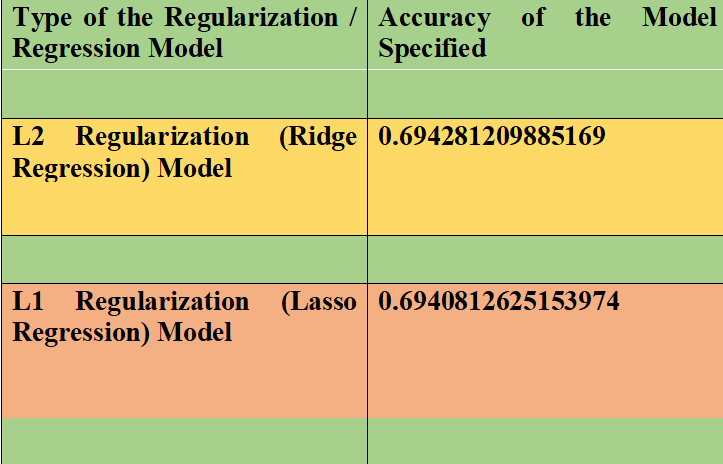

It can be observed from the above Implementation and Analysis that:
    

Accuracy of the L2 Regularization (Ridge Regression) Model : 0.694281209885169

    Accuracy(approximately) = 0.6943 
    

Accuracy of the L1 Regularization (Lasso Regression) Model : 0.6940812625153974 

    Accuracy(approximately) = 0.6941
    

Therefore, it can be inferred that the L2 Regularization (Ridge Regression) Model has higher Accuracy of 0.6943(approx)
that is it has better Accuracy as compared to the L1 Regularization (Lasso Regression) Model that has 
Accuracy of 0.6941(approx) that is of lesser Accuracy.

Thus, the L2 Regularization (Ridge Regression) Model implemented for performing Regression on the "house_price" dataset
for the purpose of predicting /determining House Prices, has the Highest Accuracy of 0.6943(approx) out of the

two Regression Models (L1 Regularization (Lasso Regression) Model and L2 Regularization (Ridge Regression) Model) 
implemented for  performing Regression on the "house_price" dataset, for the purpose of House Price Prediction.